# 1.Import Library dan Dataset

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
Netflix = pd.read_csv("netflix daily top 10 bersih.csv", sep = ";")
Netflix.head()

,Unnamed: 0,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,0,01/04/2020,1,1.0,1.000000,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,1,01/04/2020,2,2.0,3.938378,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2,01/04/2020,3,3.0,2.000000,All American,TV Show,Yes,"Mar 28, 2019",9,76
3,3,01/04/2020,4,4.0,3.938378,Blood Father,Movie,Yes,"Mar 26, 2020",5,30
4,4,01/04/2020,5,5.0,4.000000,The Platform,Movie,Yes,"Mar 20, 2020",9,55


# 2. Melakukan preprocessing

In [45]:
print("Jumlah record yang memiliki nilai null:")
Netflix.isna().sum()

Jumlah record yang memiliki nilai null:


Unnamed: 0              0
As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [46]:
Netflix.duplicated().sum()

0

In [47]:
Netflix.drop_duplicates(inplace = True)

In [48]:
Netflix[Netflix.duplicated()]

,Unnamed: 0,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score


In [49]:
Netflix.duplicated().sum()

0

**Mengecek Nilai Unik pada Attribut Type untuk menentukan class**

In [50]:
Netflix['Type'].unique()

array(['TV Show', 'Movie', 'StandUp Comedy', 'Concert/Perf…'],
      dtype=object)

**Melakukan Encoding**

In [51]:
encoder = OrdinalEncoder()
Netflix["As of"] = encoder.fit_transform(Netflix[["As of"]])
Netflix["Title"] = encoder.fit_transform(Netflix[["Title"]])
Netflix["Type"] = encoder.fit_transform(Netflix[["Type"]])
Netflix["Netflix Exclusive"] = encoder.fit_transform(Netflix[["Netflix Exclusive"]])
Netflix["Netflix Release Date"] = encoder.fit_transform(Netflix[["Netflix Release Date"]])

# 3.Split dataset

In [52]:
X = Netflix[['As of', 'Rank', 'Year to Date Rank', 
        'Last Week Rank', 'Title', 'Netflix Exclusive',
        'Netflix Release Date', 'Days In Top 10', 'Viewership Score']]
Y = Netflix['Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# Menampilkan Dimensi
print("Dimensi X_Train: ", X_train.shape)
print("Dimensi X_Test: ", X_test.shape)
print("Dimensi Y_Train: ", Y_train.shape)
print("Dimensi Y_Test: ", Y_test.shape)

Dimensi X_Train:  (4970, 9)
Dimensi X_Test:  (2130, 9)
Dimensi Y_Train:  (4970,)
Dimensi Y_Test:  (2130,)


# 4. Menyesuaikan output layer dengan target (kategorikal atau kontinu) pada dataset
**Encoding Label**

In [53]:
num_class = 4

y_train = tf.keras.utils.to_categorical(Y_train, num_class)
y_test = tf.keras.utils.to_categorical(Y_test, num_class)

# 5. Membuat Deep Neural Network dengan Sequential Model

In [54]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation='relu', input_dim = 9),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               5120      
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 4)                 516       
                                                                 
Total params: 169860 (663.52 KB)
Trainable params: 169860 (663.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 6. Menyesuaikan loss dan metrics dengan target yang digunakan

In [55]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7.Lakukan evaluasi model terhadap data test dan Gunakan akurasi (dapat melalui model.evaluate atau sklearn.metrics) untuk mengevaluasi model jika dataset merupakan kasus klasifikasi

**Fitting Training Model**

In [74]:
Netflix_data = model.fit(X_train, y_train, epochs = 100, batch_size = 512, validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 0s 37ms/step - loss: 0.2264 - accuracy: 0.7602 - val_loss: 0.2507 - val_accuracy: 0.7239
Epoch 2/100
10/10 [==============================] - 0s 28ms/step - loss: 0.2343 - accuracy: 0.7366 - val_loss: 0.2559 - val_accuracy: 0.7258
Epoch 3/100
10/10 [==============================] - 0s 34ms/step - loss: 0.2375 - accuracy: 0.7376 - val_loss: 0.2680 - val_accuracy: 0.6986
Epoch 4/100
10/10 [==============================] - 0s 31ms/step - loss: 0.2335 - accuracy: 0.7416 - val_loss: 0.2715 - val_accuracy: 0.7188
Epoch 5/100
10/10 [==============================] - 0s 32ms/step - loss: 0.2256 - accuracy: 0.7592 - val_loss: 0.2444 - val_accuracy: 0.7338
Epoch 6/100
10/10 [==============================] - 0s 30ms/step - loss: 0.2342 - accuracy: 0.7505 - val_loss: 0.2838 - val_accuracy: 0.7075
Epoch 7/100
10/10 [==============================] - 0s 31ms/step - loss: 0.2365 - accuracy: 0.7356 - val_loss: 0.2635 - val_accuracy: 0.7113
Epoch 

**Akurasi Score Testing**

In [75]:
score_testing = model.evaluate(X_test, y_test)
print("TEST LOSS      : ", score_testing[0])
print("TEST ACCURACY  : ", score_testing[1])

67/67 [==============================] - 0s 4ms/step - loss: 0.2220 - accuracy: 0.7793
TEST LOSS      :  0.2220342457294464
TEST ACCURACY  :  0.7793427109718323


**Akurasi Score Training**

In [81]:
score_training = model.evaluate(X_train, y_train)
print("TEST LOSS      : ", score_training[0])
print("TEST ACCURACY  : ", score_training[1])

156/156 [==============================] - 1s 4ms/step - loss: 0.1747 - accuracy: 0.8360
TEST LOSS      :  0.17468379437923431
TEST ACCURACY  :  0.8360161185264587


# 9.Buat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

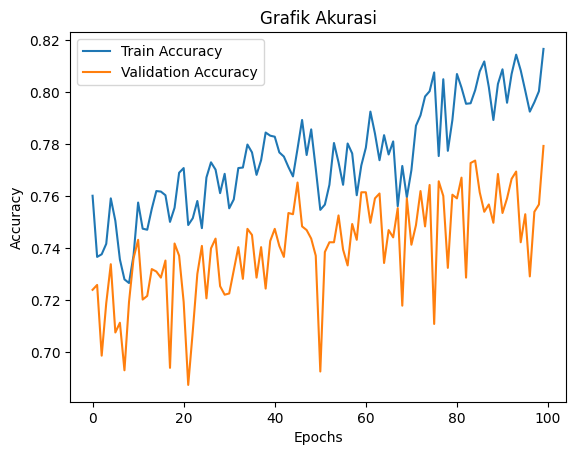

In [82]:
import matplotlib.pyplot as plt
plt.plot(Netflix_data.history['accuracy'], label='Train Accuracy')
plt.plot(Netflix_data.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Grafik Akurasi")
plt.legend()
plt.show()

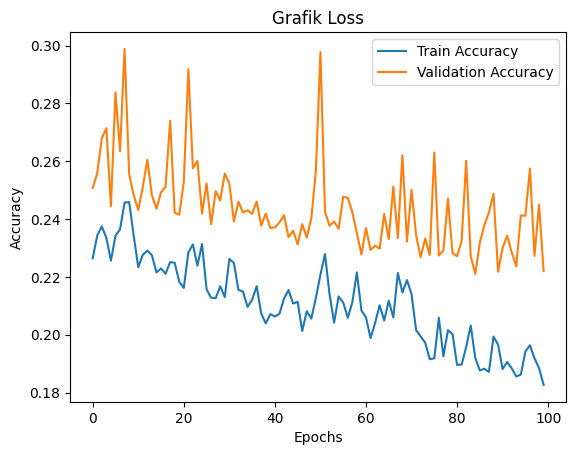

In [83]:
import matplotlib.pyplot as plt
plt.plot(Netflix_data.history['loss'], label='Train Accuracy')
plt.plot(Netflix_data.history['val_loss'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Grafik Loss")
plt.legend()
plt.show()

# 10. Save Hasil

In [85]:
model.save('Hasil_Posttest8.h5')